In [3]:
import pandas as pd
import numpy as np

## **Dataset View**

In [13]:
df = pd.read_csv(r"C:\Users\Gaya\Downloads\weather_data.csv")
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


## **Data Preparation**

In [3]:
from sklearn.preprocessing import  StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


In [4]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


### **Data types**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


### **Check Missing Values**

In [17]:
df.isna().sum()

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [19]:
df_processed = df.copy()

### **Data pre-processing Pipeline**

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd  

class NumericConverter(BaseEstimator, TransformerMixin):
    def fit(self, data, target=None):
        return self

    def transform(self, data):
        numeric_columns = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
        data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
        return data

features_to_scale = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

class MissingValueHandler(BaseEstimator, TransformerMixin):
    def fit(self, data, target=None):
        return self

    def transform(self, data):
        for feature in features_to_scale:
            data[feature].fillna(data[feature].median(), inplace=True)
        return data

class DataStandardizer(BaseEstimator, TransformerMixin):
    def fit(self, data, target=None):
        self.scaler = StandardScaler()
        self.scaler.fit(data[features_to_scale])  # Fit on training data
        return self

    def transform(self, data):
        data[features_to_scale] = self.scaler.transform(data[features_to_scale])  # Apply same scaler
        return data

class TargetEncoder(BaseEstimator, TransformerMixin):
    def fit(self, data, target=None):
        return self

    def transform(self, data):
        data['rain_or_not'] = (data['rain_or_not'] == "Rain").astype(int)
        return data

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, data, target=None):
        return self

    def transform(self, data):
        data['date'] = pd.to_datetime(data['date'], errors='coerce')
        data['month'] = data['date'].dt.month.astype(str)
        data['day'] = data['date'].dt.day.astype(str)
        return data.drop(columns=['date'])

data_preprocessing_pipeline = Pipeline(steps=[
    ('NumericConversion', NumericConverter()),
    ('HandleMissingValues', MissingValueHandler()),
    ('StandardizeFeatures', DataStandardizer()),
    ('EncodeFeatures', FeatureEncoder()),
    ('EncodeTarget', TargetEncoder())
])

In [106]:
df_processed = data_preprocessing_pipeline.fit_transform(df) 

C:\Users\Gaya\AppData\Local\Temp\ipykernel_11148\1734546371.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].median(), inplace=True)


In [57]:
df_processed.head()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,month,day
0,-0.346303,-0.479808,0.057716,1,-1.027348,-0.281128,1,1
1,0.601659,0.253825,-0.415527,1,1.528340,1.257899,1,2
2,0.350490,-0.195465,1.078158,1,-1.353475,1.150926,1,3
3,0.227672,-0.107915,-0.318667,1,1.127882,-1.127123,1,4
4,-0.362306,0.144312,0.903535,1,-0.418186,1.014450,1,5


In [108]:
df_processed.isna().sum()

avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
month              0
day                0
dtype: int64

In [65]:
df_processed.describe()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
count,3.110000e+02,3.110000e+02,3.110000e+02,311.000000,3.110000e+02,3.110000e+02
mean,1.028116e-16,4.569407e-16,7.425286e-17,0.636656,-2.855879e-17,8.674733e-16
std,1.001612e+00,1.001612e+00,1.001612e+00,0.481738,1.001612e+00,1.001612e+00
min,-1.665345e+00,-1.341906e+00,-1.436151e+00,0.000000,-1.753943e+00,-1.730466e+00
25%,-8.367950e-01,-1.038202e+00,-7.364830e-01,0.000000,-8.466853e-01,-8.788565e-01
50%,1.714184e-01,8.735538e-02,-4.209132e-02,1.000000,2.999052e-02,3.054851e-02
75%,8.773980e-01,9.001727e-01,6.438495e-01,1.000000,8.595001e-01,8.864354e-01
max,1.351192e+00,1.862740e+00,9.430295e+00,1.000000,1.768137e+00,1.684126e+00


## **Exploratory Data Analysis**


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

### **Correlation Analysis (Heatmap)**

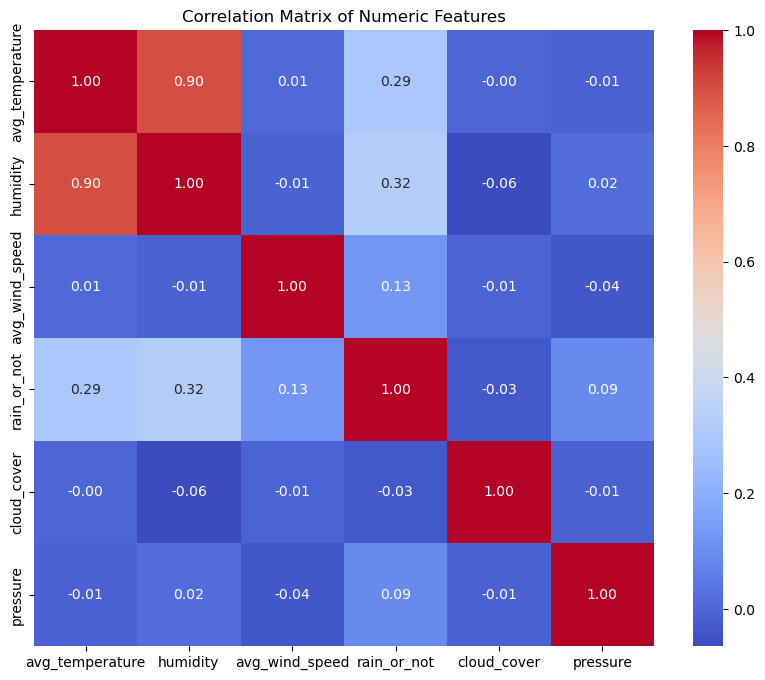

In [114]:

# Drop 'day' and 'month' columns to focus on numeric features
df_numeric = df_processed.drop(['day', 'month'], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.savefig("correlation_matrix.png")
plt.show()

### **Boxplots for Outlier Detection**

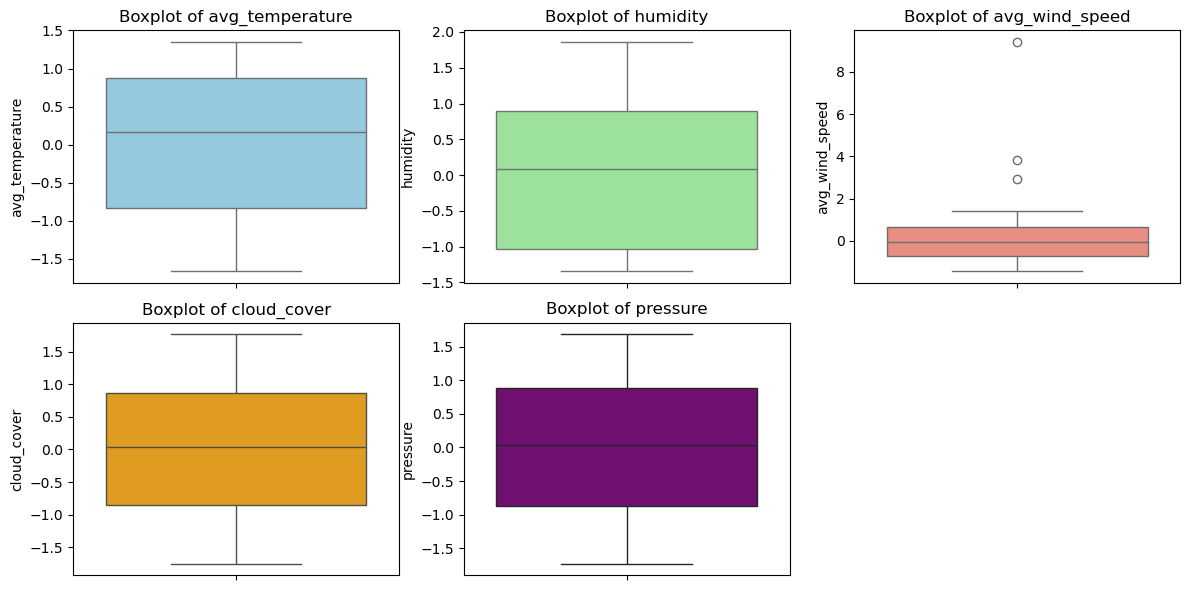

In [118]:
# Define the features to visualize
selected_features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

# Define a list of colors for each boxplot
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']

# Create subplots for boxplots of each feature
plt.figure(figsize=(12, 6))
for index, feature in enumerate(selected_features):
    plt.subplot(2, 3, index + 1)
    sns.boxplot(y=df[feature], color=colors[index])  # Use different colors
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### **Feature Distributions (Histograms & KDE Plots)**

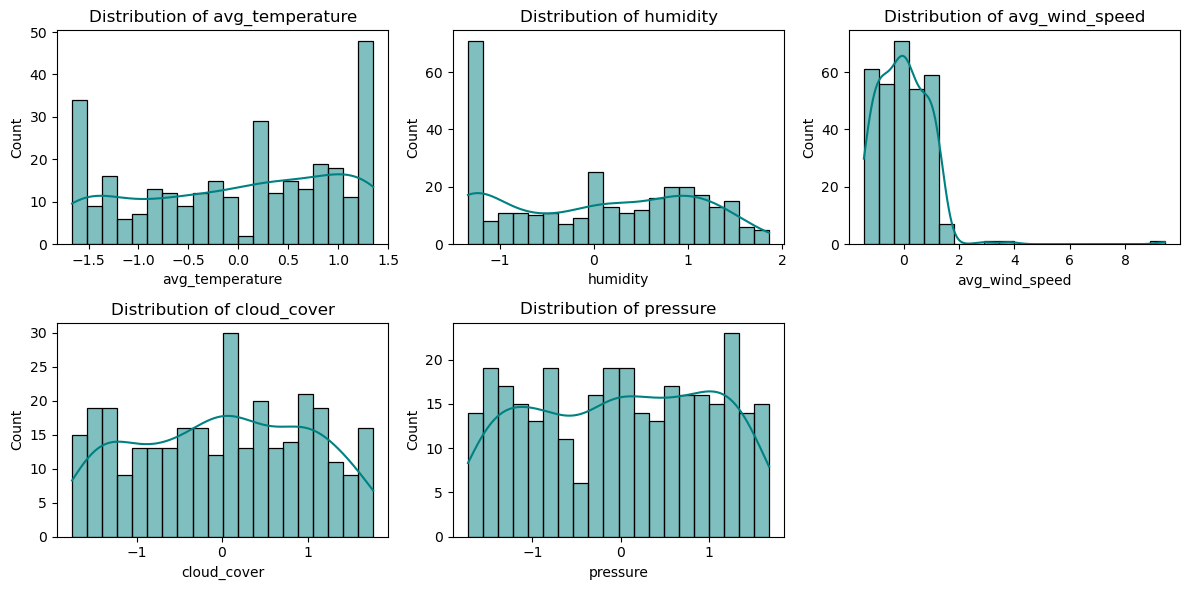

In [120]:
# Define the features to visualize
selected_features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

# Create subplots for histograms of each feature
plt.figure(figsize=(12, 6))
for index, feature in enumerate(selected_features):
    plt.subplot(2, 3, index + 1)
    sns.histplot(df[feature], kde=True, bins=20, color='teal', edgecolor='black')  # Customized color
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


### **Rain Probability by Feature (Violin & Boxplots)**

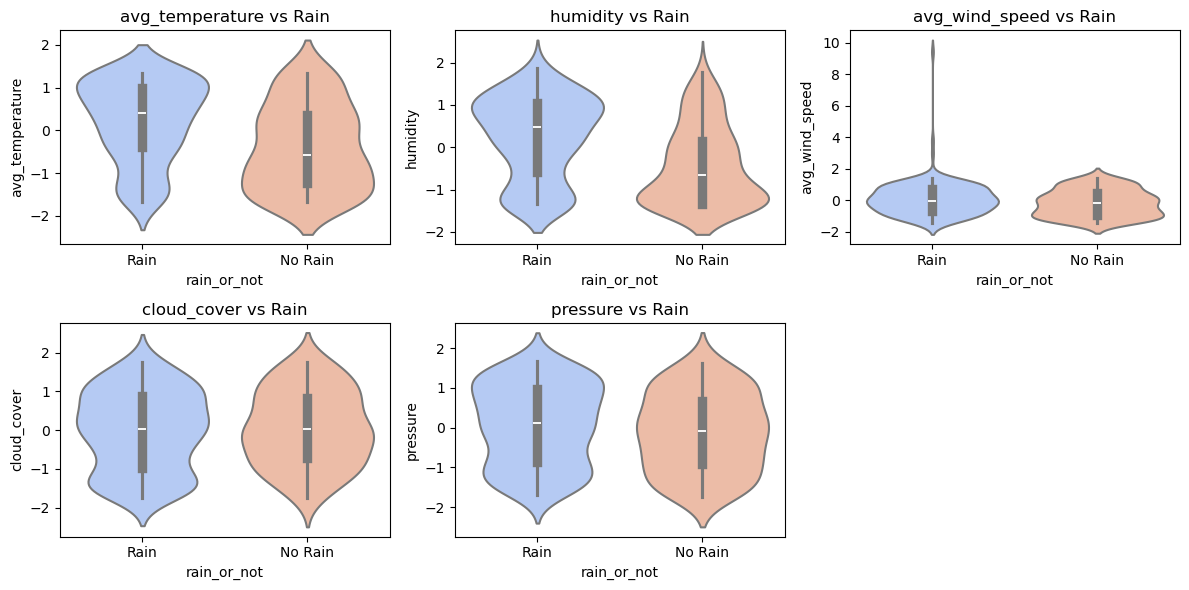

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features to visualize
selected_features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

# Create subplots for violin plots of each feature
plt.figure(figsize=(12, 6))
for index, feature in enumerate(selected_features):
    plt.subplot(2, 3, index + 1)
    sns.violinplot(x=df['rain_or_not'], y=df[feature], hue=df['rain_or_not'], palette='coolwarm', linewidth=1.5, legend=False)  # Updated to use `hue`
    plt.title(f'{feature} vs Rain')
plt.tight_layout()
plt.savefig('rain_probability_vs_features.png')  # Save the plot
plt.show()

### **Pairplots (Feature Interactions)**

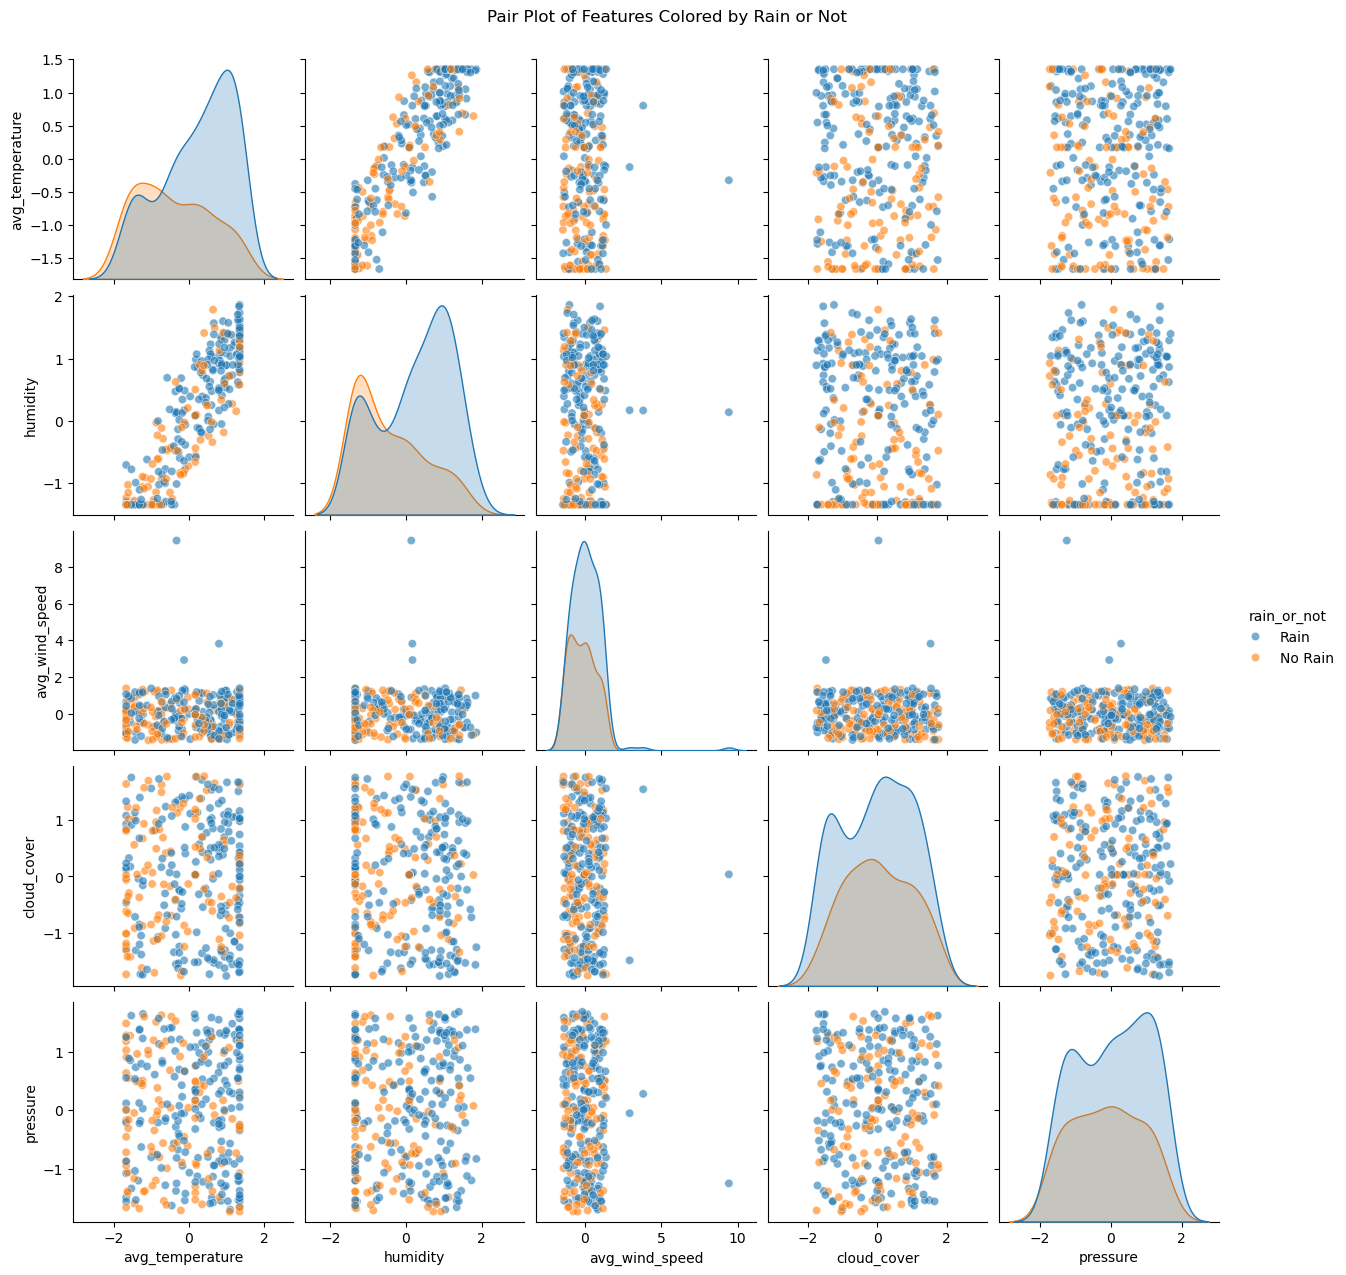

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot with hue for 'rain_or_not' and KDE on the diagonal
sns.pairplot(df, hue="rain_or_not", diag_kind="kde", plot_kws={'alpha': 0.6})

# Add a title to the plot
plt.suptitle('Pair Plot of Features Colored by Rain or Not', y=1.02)

# Save the plot
plt.savefig('pair_plot_rain_or_not.png', bbox_inches='tight')

# Display the plot
plt.show()

C:\Users\Gaya\AppData\Local\Temp\ipykernel_11148\2336740090.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


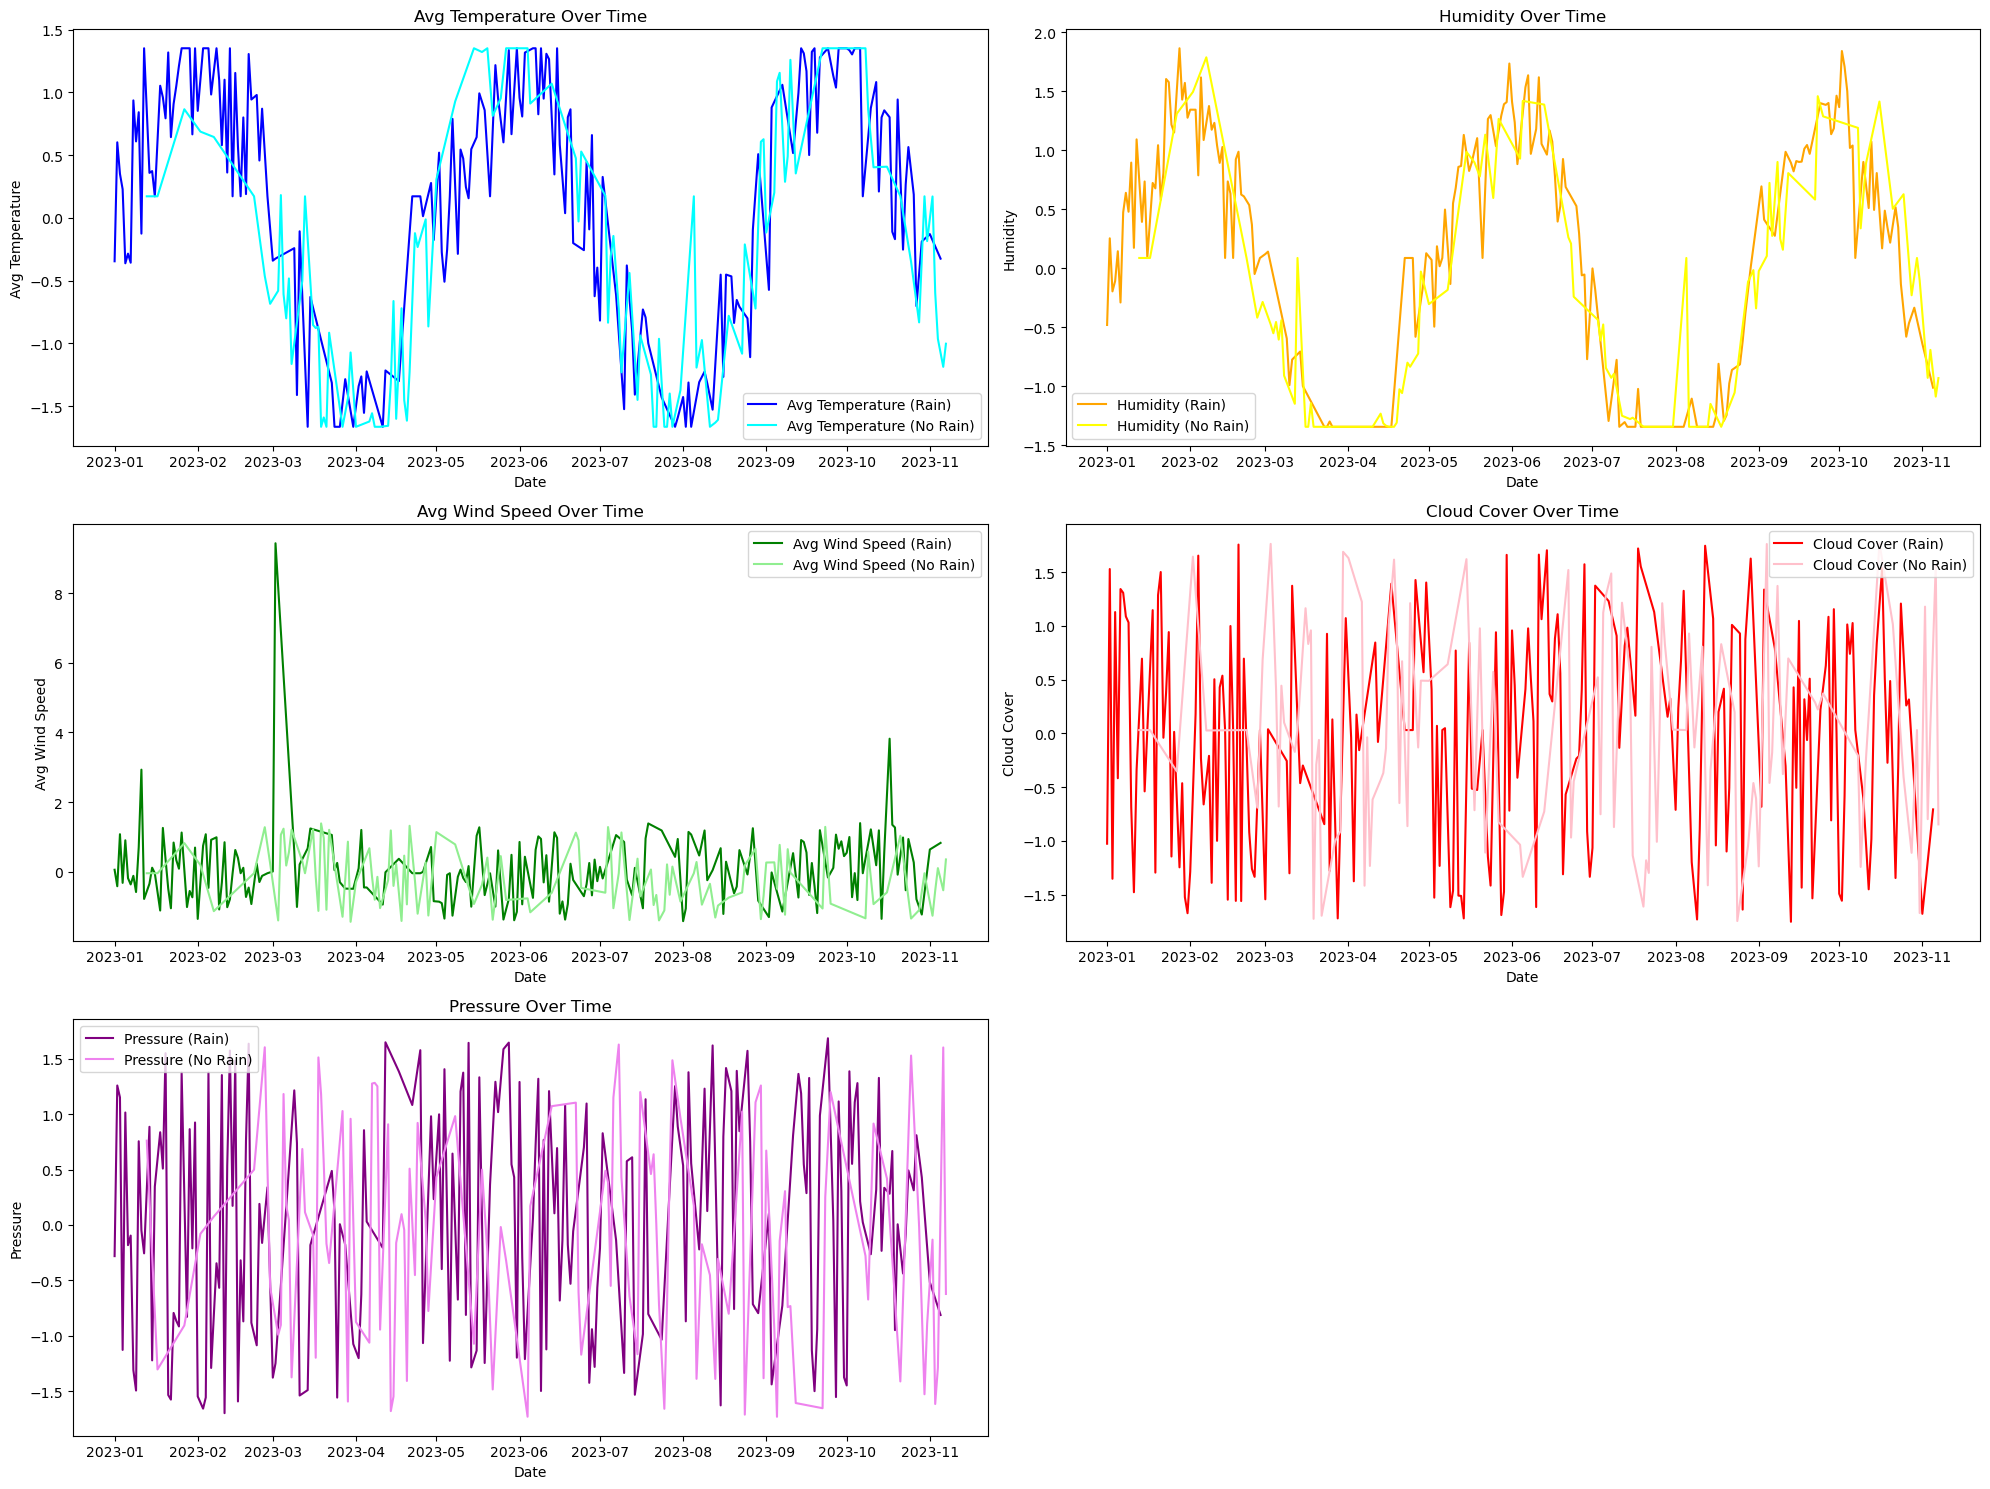

In [144]:
# Define the preprocessing pipeline
data_preprocessing_pipeline_2 = Pipeline(steps=[
    ('TypeCastToNum', ConvertToNum()),
    ('Missingval', Missingval()),
    ('StandardizeData', StandardizeData()),
    ('DataEncoder', DataEncoder()),  # Ensure this does not drop the 'date' column
    ('TargetEncode', TargetEncode())
])

# Apply the pipeline to the data
df_with_date = df.copy()
df_with_date = data_preprocessing_pipeline_2.fit_transform(df_with_date)

# Ensure the 'date' column is preserved for plotting
if 'date' not in df_with_date.columns:
    df_with_date['date'] = df['date']  # Add the 'date' column back if it was dropped

# Plot time series data for different features
plt.figure(figsize=(20, 15))

# Plot avg_temperature over time
plt.subplot(3, 2, 1)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['avg_temperature'], label='Avg Temperature (Rain)', color='blue')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['avg_temperature'], label='Avg Temperature (No Rain)', color='cyan')
plt.xlabel('Date')
plt.ylabel('Avg Temperature')
plt.title('Avg Temperature Over Time')
plt.legend()

# Plot humidity over time
plt.subplot(3, 2, 2)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['humidity'], label='Humidity (Rain)', color='orange')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['humidity'], label='Humidity (No Rain)', color='yellow')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Over Time')
plt.legend()

# Plot avg_wind_speed over time
plt.subplot(3, 2, 3)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['avg_wind_speed'], label='Avg Wind Speed (Rain)', color='green')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['avg_wind_speed'], label='Avg Wind Speed (No Rain)', color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Avg Wind Speed')
plt.title('Avg Wind Speed Over Time')
plt.legend()

# Plot cloud_cover over time
plt.subplot(3, 2, 4)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['cloud_cover'], label='Cloud Cover (Rain)', color='red')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['cloud_cover'], label='Cloud Cover (No Rain)', color='pink')
plt.xlabel('Date')
plt.ylabel('Cloud Cover')
plt.title('Cloud Cover Over Time')
plt.legend()

# Plot pressure over time
plt.subplot(3, 2, 5)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['pressure'], label='Pressure (Rain)', color='purple')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['pressure'], label='Pressure (No Rain)', color='violet')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Pressure Over Time')
plt.legend()

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('time_series_data.png')  # Save the plot
plt.show()

In [85]:
df_with_date.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,month,day
0,2023-01-01,-0.346303,-0.479808,0.057716,1,-1.027348,-0.281128,1,1
1,2023-01-02,0.601659,0.253825,-0.415527,1,1.528340,1.257899,1,2
2,2023-01-03,0.350490,-0.195465,1.078158,1,-1.353475,1.150926,1,3
3,2023-01-04,0.227672,-0.107915,-0.318667,1,1.127882,-1.127123,1,4
4,2023-01-05,-0.362306,0.144312,0.903535,1,-0.418186,1.014450,1,5


In [86]:
df_processed.head()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,month,day
0,-0.346303,-0.479808,0.057716,1,-1.027348,-0.281128,1,1
1,0.601659,0.253825,-0.415527,1,1.528340,1.257899,1,2
2,0.350490,-0.195465,1.078158,1,-1.353475,1.150926,1,3
3,0.227672,-0.107915,-0.318667,1,1.127882,-1.127123,1,4
4,-0.362306,0.144312,0.903535,1,-0.418186,1.014450,1,5


## **Model Building and Training**

In [142]:
# Drop 'month' and 'day' columns
df_processed_final = df_processed.drop(['month', 'day'], axis=1)

# Filter rows based on the 95th percentile of specific columns
df_processed_final = df_processed_final[
    (df_processed_final['avg_wind_speed'] < df_processed_final['avg_wind_speed'].quantile(0.95)) &
    (df_processed_final['avg_temperature'] < df_processed_final['avg_temperature'].quantile(0.95)) &
    (df_processed_final['humidity'] < df_processed_final['humidity'].quantile(0.95))
]

# Add a new 'dew_point' column
df_processed_final['dew_point'] = df_processed_final['avg_temperature'] - ((100 - df_processed_final['humidity']) / 5)

# Display the shape of the final DataFrame
print("Shape of the final DataFrame:", df_processed_final.shape)

Shape of the final DataFrame: (256, 7)


In [146]:
df_processed_final.head()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,dew_point
0,-0.346303,-0.479808,0.057716,1,-1.027348,-0.281128,-20.442265
1,0.601659,0.253825,-0.415527,1,1.528340,1.257899,-19.347576
2,0.350490,-0.195465,1.078158,1,-1.353475,1.150926,-19.688603
3,0.227672,-0.107915,-0.318667,1,1.127882,-1.127123,-19.793910
4,-0.362306,0.144312,0.903535,1,-0.418186,1.014450,-20.333443


Training and evaluating Logistic Regression...
Logistic Regression Best Params: {'C': 0.1}
Logistic Regression F1 Score: 0.7397260273972602
Logistic Regression Accuracy: 0.6346153846153846
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.26      0.39        23
           1       0.61      0.93      0.74        29

    accuracy                           0.63        52
   macro avg       0.68      0.60      0.56        52
weighted avg       0.67      0.63      0.58        52



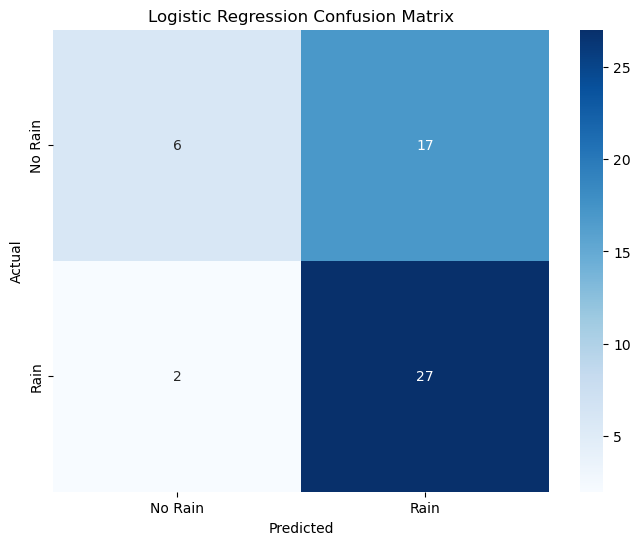

------------------------------------------------------
Training and evaluating Random Forest...
Random Forest Best Params: {'n_estimators': 200}
Random Forest F1 Score: 0.7536231884057971
Random Forest Accuracy: 0.6730769230769231
Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.65      0.90      0.75        29

    accuracy                           0.67        52
   macro avg       0.70      0.64      0.63        52
weighted avg       0.69      0.67      0.65        52



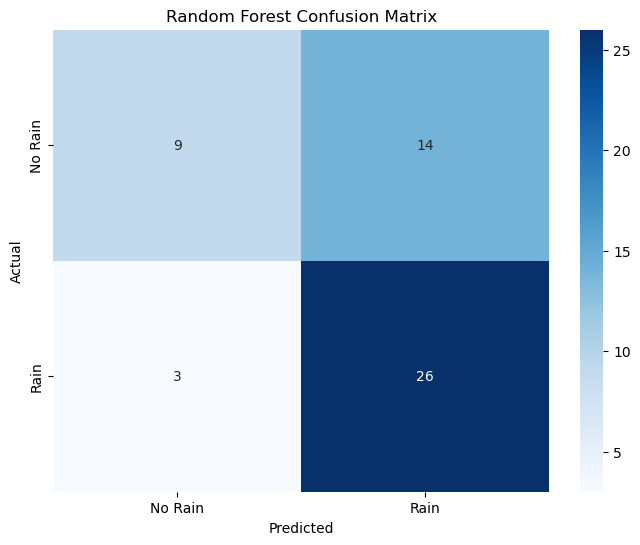

------------------------------------------------------
Training and evaluating SVM...
SVM Best Params: {'C': 0.1, 'kernel': 'rbf'}
SVM F1 Score: 0.7160493827160493
SVM Accuracy: 0.5576923076923077
SVM Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.56      1.00      0.72        29

    accuracy                           0.56        52
   macro avg       0.28      0.50      0.36        52
weighted avg       0.31      0.56      0.40        52



C:\Users\Gaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gaya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


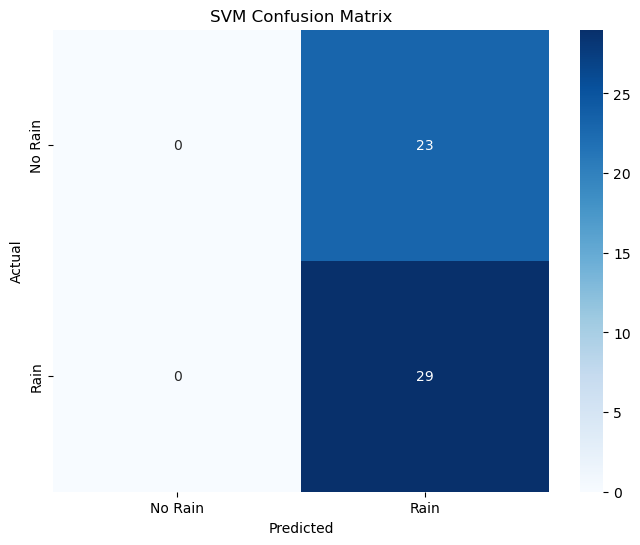

------------------------------------------------------
Training and evaluating Decision Tree...
Decision Tree Best Params: {'max_depth': 20}
Decision Tree F1 Score: 0.6666666666666666
Decision Tree Accuracy: 0.5576923076923077
Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.26      0.34        23
           1       0.57      0.79      0.67        29

    accuracy                           0.56        52
   macro avg       0.54      0.53      0.50        52
weighted avg       0.54      0.56      0.52        52



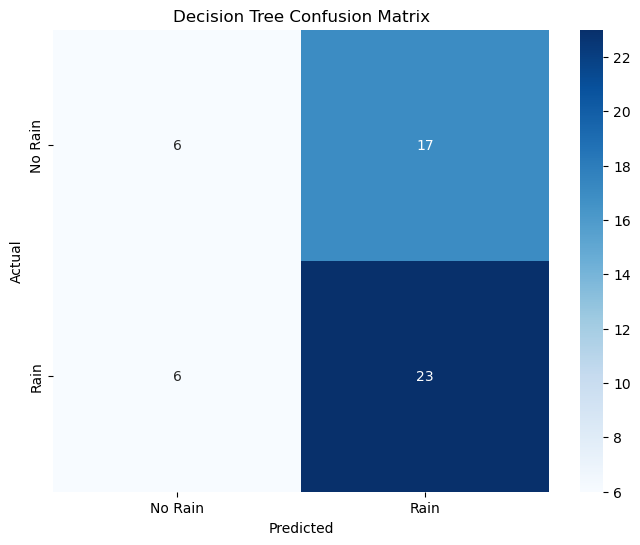

------------------------------------------------------
Training and evaluating KNN...
KNN Best Params: {'n_neighbors': 5}
KNN F1 Score: 0.7272727272727273
KNN Accuracy: 0.6538461538461539
KNN Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.43      0.53        23
           1       0.65      0.83      0.73        29

    accuracy                           0.65        52
   macro avg       0.66      0.63      0.63        52
weighted avg       0.66      0.65      0.64        52



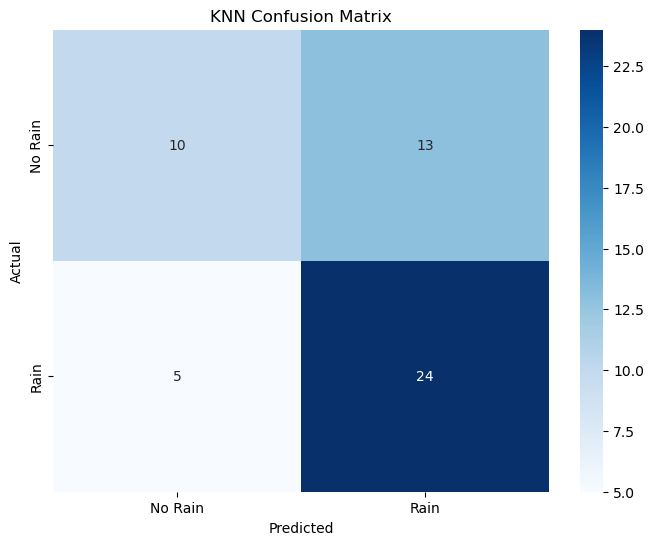

------------------------------------------------------
Training and evaluating Naive Bayes...
Naive Bayes Best Params: {}
Naive Bayes F1 Score: 0.7575757575757576
Naive Bayes Accuracy: 0.6923076923076923
Naive Bayes Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.68      0.86      0.76        29

    accuracy                           0.69        52
   macro avg       0.70      0.67      0.67        52
weighted avg       0.70      0.69      0.68        52



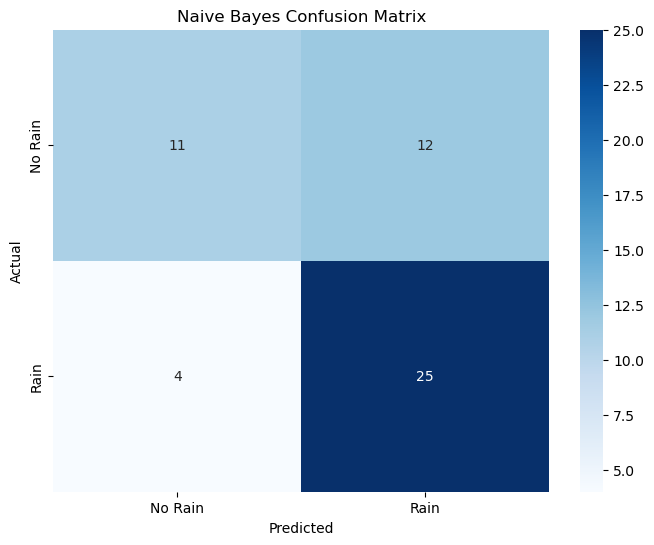

------------------------------------------------------
Training and evaluating Gradient Boosting...
Gradient Boosting Best Params: {'n_estimators': 200}
Gradient Boosting F1 Score: 0.704225352112676
Gradient Boosting Accuracy: 0.5961538461538461
Gradient Boosting Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.26      0.36        23
           1       0.60      0.86      0.70        29

    accuracy                           0.60        52
   macro avg       0.60      0.56      0.53        52
weighted avg       0.60      0.60      0.55        52



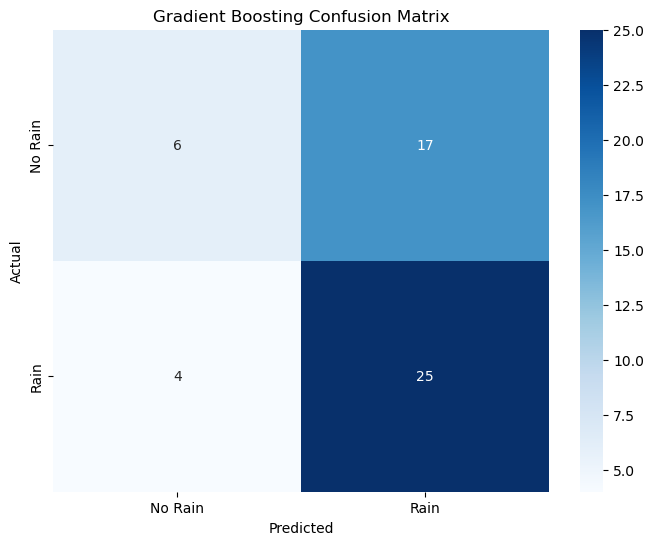

------------------------------------------------------
Training and evaluating AdaBoost...


C:\Users\Gaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Gaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Gaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Gaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Gaya\an

AdaBoost Best Params: {'n_estimators': 100}
AdaBoost F1 Score: 0.6764705882352942
AdaBoost Accuracy: 0.5769230769230769
AdaBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.30      0.39        23
           1       0.59      0.79      0.68        29

    accuracy                           0.58        52
   macro avg       0.56      0.55      0.53        52
weighted avg       0.57      0.58      0.55        52



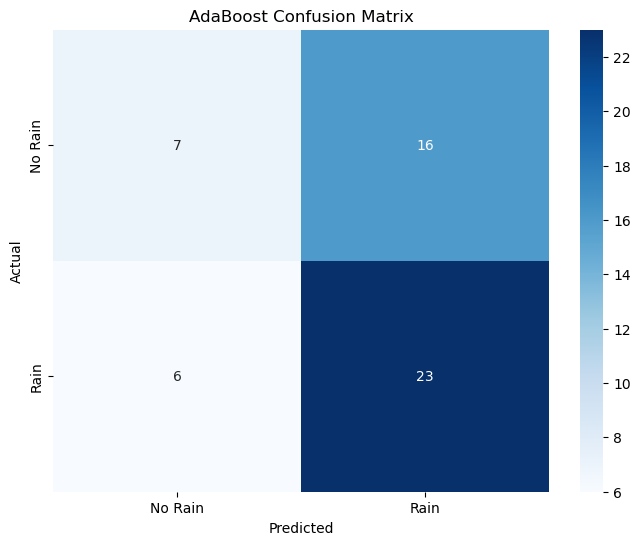

------------------------------------------------------
Training and evaluating Bagging...
Bagging Best Params: {'n_estimators': 100}
Bagging F1 Score: 0.6875
Bagging Accuracy: 0.6153846153846154
Bagging Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.43      0.50        23
           1       0.63      0.76      0.69        29

    accuracy                           0.62        52
   macro avg       0.61      0.60      0.59        52
weighted avg       0.61      0.62      0.60        52



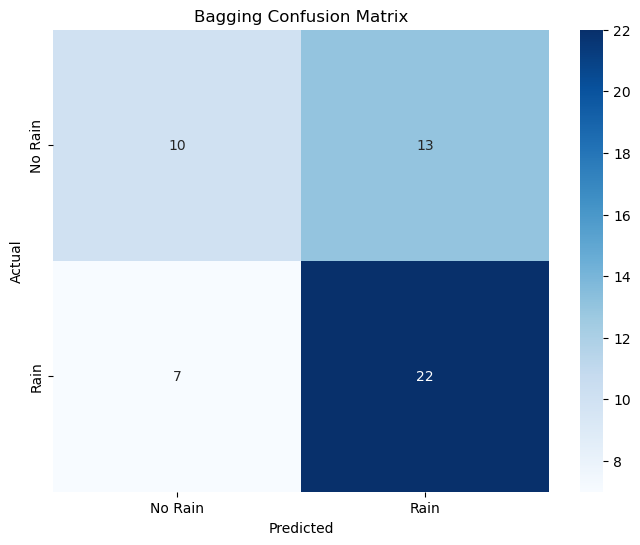

------------------------------------------------------
Training and evaluating Extra Trees...
Extra Trees Best Params: {'n_estimators': 200}
Extra Trees F1 Score: 0.676923076923077
Extra Trees Accuracy: 0.5961538461538461
Extra Trees Classification Report: 
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        23
           1       0.61      0.76      0.68        29

    accuracy                           0.60        52
   macro avg       0.59      0.57      0.57        52
weighted avg       0.59      0.60      0.58        52



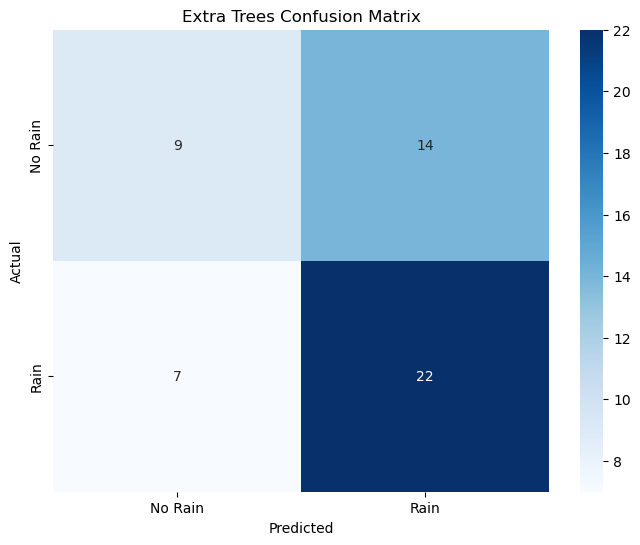

------------------------------------------------------
Voting Classifier F1 Score: 0.7352941176470589
Voting Classifier Accuracy: 0.6538461538461539
Voting Classifier Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.39      0.50        23
           1       0.64      0.86      0.74        29

    accuracy                           0.65        52
   macro avg       0.67      0.63      0.62        52
weighted avg       0.66      0.65      0.63        52



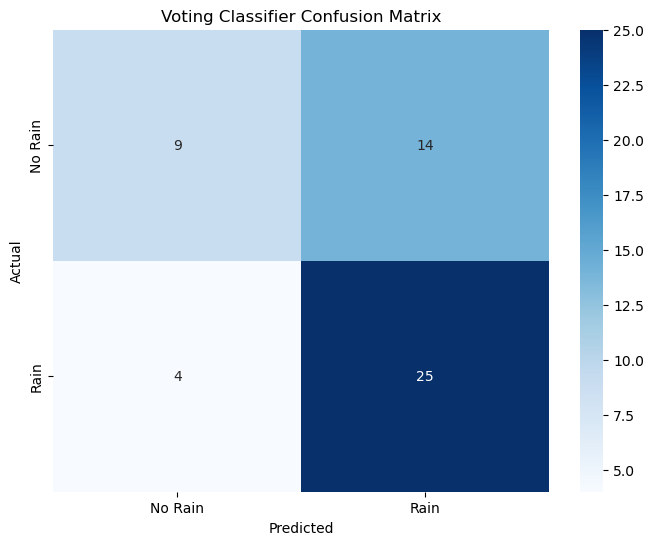

High-Accuracy Models: ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes', 'Bagging']


In [148]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare features and target
X = df_processed_final.drop('rain_or_not', axis=1)
y = df_processed_final['rain_or_not']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Define models and their parameter grids
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(probability=True)),  # Enable probability for VotingClassifier
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Bagging', BaggingClassifier()),
    ('Extra Trees', ExtraTreesClassifier())
]

param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]}
}

# Train and evaluate models
best_models = {}
high_accuracy_models = []

for name, model in models:
    print(f'Training and evaluating {name}...')
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    
    # Evaluate on the test set
    y_pred = best_models[name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f'{name} Best Params: {grid_search.best_params_}')
    print(f'{name} F1 Score: {f1}')
    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Classification Report: \n{classification_report(y_test, y_pred)}')
    
    # Add to high-accuracy models if accuracy > 0.6
    if accuracy > 0.6:
        high_accuracy_models.append(name)
    
    # Plot confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    
    print('------------------------------------------------------')

# Create a Voting Classifier with high-accuracy models
if high_accuracy_models:
    voting_estimators = [(name, best_models[name]) for name in high_accuracy_models]
    voting_clf = VotingClassifier(estimators=voting_estimators, voting='hard')
    
    # Train and evaluate the Voting Classifier
    voting_clf.fit(X_train, y_train)
    y_pred = voting_clf.predict(X_test)
    print(f'Voting Classifier F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Voting Classifier Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Voting Classifier Classification Report: \n{classification_report(y_test, y_pred)}')
    
    # Plot confusion matrix for Voting Classifier
    con_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Voting Classifier Confusion Matrix')
    plt.show()
else:
    print("No high-accuracy models found for Voting Classifier.")

# Print high-accuracy models
print("High-Accuracy Models:", high_accuracy_models)

### **Model selection**

Naive Bayes F1 Score: 0.7575757575757576
Naive Bayes Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.68      0.86      0.76        29

    accuracy                           0.69        52
   macro avg       0.70      0.67      0.67        52
weighted avg       0.70      0.69      0.68        52

Naive Bayes Accuracy: 0.6923076923076923


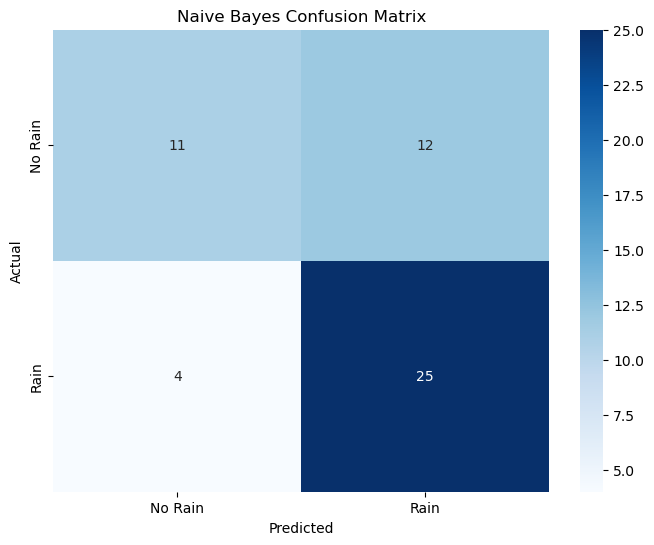

Predicted probabilities for the test set:
[0.99602422 0.83318923 0.13003297 0.93342485 0.98174218 0.84337889
 0.51741545 0.24710529 0.77596029 0.87632233 0.16679479 0.97647446
 0.97523924 0.99771879 0.83900549 0.99647236 0.15857431 0.39837369
 0.99081998 0.25317155 0.96498878 0.99359259 0.99216988 0.99323032
 0.61363981 0.99127105 0.86154772 0.2714948  0.41205313 0.97740015
 0.95055616 0.77186365 0.21252871 0.96116906 0.94219651 0.23901582
 0.65234905 0.98364051 0.17731031 0.93641683 0.14951767 0.99618046
 0.96008472 0.52084565 0.11864727 0.97689385 0.86857605 0.99258572
 0.9339639  0.12431659 0.23202685 0.98472987]


In [150]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Rain)

# Evaluate the model
print(f'Naive Bayes F1 Score: {f1_score(y_test, y_pred_nb)}')
print(f'Naive Bayes Classification Report: \n{classification_report(y_test, y_pred_nb)}')
print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}')

# Plot confusion matrix
con_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Display predicted probabilities
print("Predicted probabilities for the test set:")
print(y_pred_proba_nb)